<a href="https://colab.research.google.com/github/TurinShayla/Python-Graph-Brain/blob/main/DelHbO_and_DelHbR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to google drive

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Call the google sheet and save it into ws work sheet.

In [ ]:
#get the url
wb = gc.open_by_key('1SWN0twJvQHvM7_e5LFVMcTVoZ75EZl_YYkyXBeoGS8c')
#get the file
ws = wb.worksheet('HbOHbR')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
print(rows)

[['ID', 'Condition', 'Def Channel 1 hbo', 'Def Channel 2 hbo', 'Def Channel 3 hbo', 'Def Channel 4 hbo', 'Def LPFC hbo', 'Def VMPFC hbo', 'Def HbO', 'Q Channel 1 hbo', 'Q Channel 2 hbo', 'Q Channel 3 hbo', 'Q Channel 4 hbo', 'Q LPFC hbo', 'Q VMPFC hbo', 'Q HbO', 'Def Channel 1 hbr', 'Def Channel 2 hbr', 'Def Channel 3 hbr', 'Def Channel 4 hbr', 'Def LPFC hbr', 'Def VMPFC hbr', 'Def HbR', 'Q Channel 1 hbr', 'Q Channel 2 hbr', 'Q Channel 3 hbr', 'Q Channel 4 hbr', 'Q LPFC hbr', 'Q VMPFC hbr', 'Q HbR'], ['DH3764', 'Game', '-0.205771468', '0.11450119', '-0.010279138', '-0.009772194', '-0.107771831', '0.052111026', '-0.027839322', '0.391084981', '0.048583896', '0.16550942', '0.253801378', '0.322443179', '0.107046658', '0.214744919', '0.2099299835', '-0.5097515759', '0.05230596616', '0.09513914465', '0.1525345641', '-0.2498912871', '-0.04713227364', '-0.2056255292', '0.2579405258', '-0.003325239348', '-0.0329138561', '-0.1192696927', '0.1275677909', '0.001269185376'], ['DH5341', 'Game', '0.1

Convert the worskheet to Dataframe

In [ ]:
import pandas as pd
#df=pd.DataFrame.from_records(rows)
df=pd.DataFrame.from_records(rows[1:],columns=rows[0])
#print(df)

Goruped by video and game

In [ ]:
grouped=df.groupby(df.Condition)
df_video=grouped.get_group("Video")
df_game=grouped.get_group("Game")
#print(df_game)

In [ ]:
# Convert all columns to numeric
df_video = df_video.apply(pd.to_numeric, errors='coerce')
# Convert all columns to numeric
df_game = df_game.apply(pd.to_numeric, errors='coerce')
#print(df_game)

In [ ]:
#Condition_1='Def HbO'
#Condition_2='Q HbO'
Condition_1='Def HbR'
Condition_2='Q HbR'

In [ ]:
Def_video= df_video['Def HbO']
Q_video=df_video['Q HbO']
Def_game=df_game['Def HbO']
Q_game=df_game['Q HbO']

In [ ]:
def calculate_mean_SD(df_X,A):
  df_X[A]=pd.to_numeric(df_X[A],errors='coerce')
  df_X_mean=df_X[A].mean()
  df_X_std=df_video[A].std()
  return df_X_mean,df_X_std

Calculate mean and SD of total brain signal

In [ ]:
def_video_mean,def_video_std=calculate_mean_SD(df_video,Condition_1)
def_game_mean,def_game_std=calculate_mean_SD(df_game,Condition_1)
Q_video_mean,Q_video_std= calculate_mean_SD(df_video,Condition_2)
Q_game_mean,Q_game_std=calculate_mean_SD(df_game,Condition_2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
labels = ['Game', 'Video']
x_pos = np.arange(len(labels))
CTEs = [def_game_mean, def_video_mean,Q_game_mean, Q_video_mean ]
error = [def_game_std, def_video_std, Q_game_std, Q_video_std]

In [ ]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

(0.11, 0.22)
(0.35, 0.17)


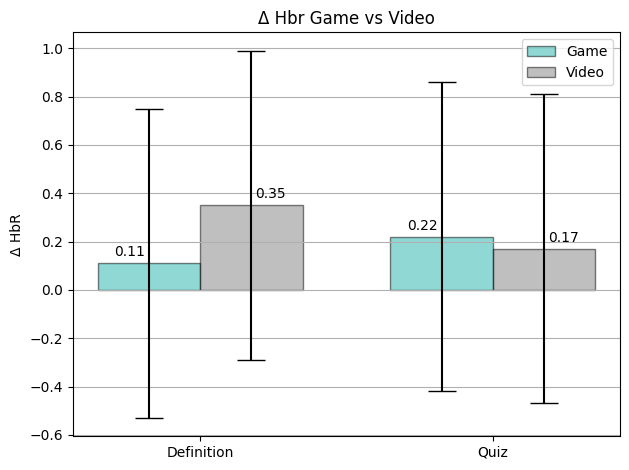

In [ ]:
#pre is game post is video
#def_mean,def_std=(round(def_game_mean,2),round(def_video_mean,2)),(round(def_game_std,2),round(def_video_std,2))
def_mean,def_std=(round(def_game_mean,2),round(Q_game_mean,2)),(round(def_game_std,2),round(Q_video_std,2))

print(def_mean)
#post_mean,post_std=(round(game_mean_Post,2),round(video_mean_Post,2)),(game_std_Post,video_std_Post)
#Q_mean,Q_std=(round(Q_game_mean,2),round(Q_video_mean,2)), (round(Q_game_std,2),round(Q_video_std,2))
Q_mean,Q_std=(round(def_video_mean,2),round(Q_video_mean,2)), (round(def_video_std,2),round(Q_video_std,2))
print(Q_mean)
ind = np.arange(len(def_mean))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, def_mean, width, yerr=def_std, align='center',
                label='Game',        capsize=10,alpha=0.5,
       color=['lightseagreen'],edgecolor='black')
rects2 = ax.bar(ind + width/2, Q_mean, width, yerr=Q_std, align='center',
                label='Video',        capsize=10,alpha=0.5,
       color=['gray'],edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('\u0394 HbR')
ax.set_title('\u0394 Hbr Game vs Video')
#ax.set_title('\u0394 HbR')
ax.set_xticks(ind)
ax.set_xticklabels(('Definition', 'Quiz'))
ax.legend(),
ax.yaxis.grid(True)
autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.savefig('delHbr.jpg',dpi=900)
plt.savefig('delHbr.pdf',dpi=1300)


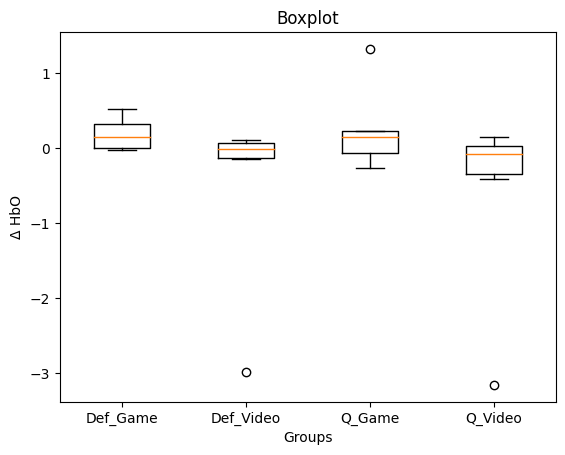

<Figure size 640x480 with 0 Axes>

In [ ]:
data = [Def_game, Def_video, Q_game, Q_video]

# Create the boxplot
plt.boxplot(data, labels=['Def_Game', 'Def_Video', 'Q_Game', 'Q_Video'])

# Set the title and labels
plt.title('Boxplot')
plt.xlabel('Groups')
plt.ylabel('\u0394 HbO')

# Display the plot
plt.show()
# Save the figure
plt.savefig('hbo_box.jpg', dpi=900)
plt.savefig('hbo_box.pdf', dpi=1300)

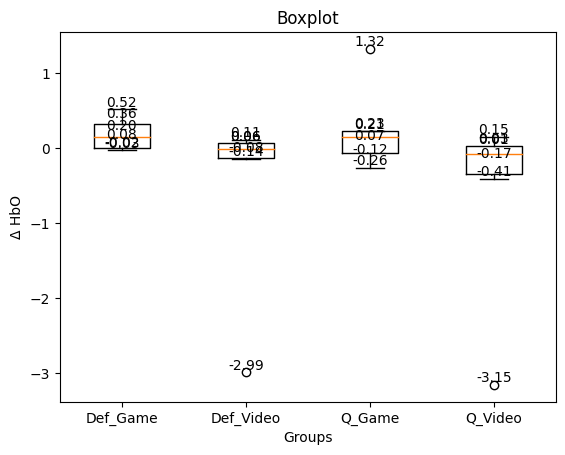

<Figure size 640x480 with 0 Axes>

In [ ]:


data = [Def_game, Def_video, Q_game, Q_video]

# Create the boxplot
plt.boxplot(data, labels=['Def_Game', 'Def_Video', 'Q_Game', 'Q_Video'])

# Set the title and labels
plt.title('Boxplot')
plt.xlabel('Groups')
plt.ylabel('\u0394 HbO')

# Iterate through the data and add text annotations
for i, group_data in enumerate(data):
    for j, value in enumerate(group_data):
        plt.text(i + 1, value, f'{value:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()

# Save the figure
plt.savefig('hbo_box.jpg', dpi=900)
plt.savefig('hbo_box.pdf', dpi=1300)


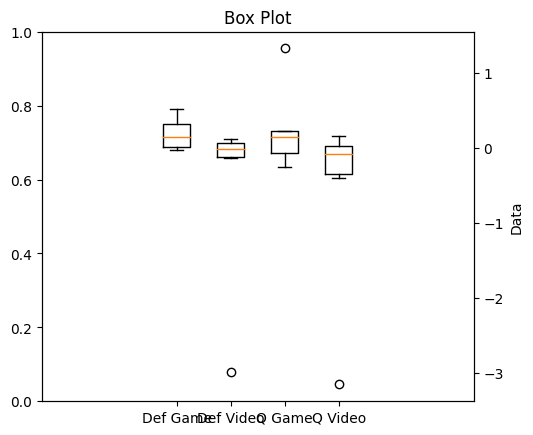

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code for the bar chart

# Box plot data
boxplot_data = [Def_game, Def_video, Q_game, Q_video]

# Create a new subplot for the box plot
ax2 = plt.twinx()
ax2.boxplot(boxplot_data, positions=[0.2, 0.4, 0.6, 0.8], widths=0.1)

# Set the labels and title for the box plot
ax2.set_ylabel('Data')
ax2.set_title('Box Plot')

# Set the x-axis tick positions and labels
ax2.set_xticks([0.2, 0.4, 0.6, 0.8])
ax2.set_xticklabels(['Def Game', 'Def Video', 'Q Game', 'Q Video'])

# Adjust the layout to accommodate the box plot
plt.subplots_adjust(right=0.8)

# Save the figure
plt.savefig('combined_plot.jpg', dpi=900)
plt.savefig('combined_plot.pdf', dpi=1300)

# Show the combined plot
plt.show()


In [ ]:
print(type(def_video_mean.tolist()), def_video_mean.tolist())

<class 'float'> 0.350845922945


Channel wise analysis

Need to assign definition and quiz separately

In [ ]:
#A='Q Channel 1 hbo'
#B='Q Channel 2 hbo'
#C='Q Channel 3 hbo'
#D='Q Channel 4 hbo'

#A='Def Channel 1 hbo'
#B='Def Channel 2 hbo'
#C='Def Channel 3 hbo'
#D='Def Channel 4 hbo'

A='Def Channel 1 hbr'
B='Def Channel 2 hbr'
C='Def Channel 3 hbr'
D='Def Channel 4 hbr'

#A='Q Channel 1 hbr'
#B='Q Channel 2 hbr'
#C='Q Channel 3 hbr'
#D='Q Channel 4 hbr'



In [ ]:
LDL_game,LDL_game_std= calculate_mean_SD(df_game,A)
LMP_game,LMP_game_std= calculate_mean_SD(df_game,B)
RMP_game,RMP_game_std= calculate_mean_SD(df_game,C)
RDL_game,RDL_game_std= calculate_mean_SD(df_game,D)

In [ ]:
LDL_video,LDL_video_std= calculate_mean_SD(df_video,A)
LMP_video,LMP_video_std= calculate_mean_SD(df_video,B)
RMP_video,RMP_video_std= calculate_mean_SD(df_video,C)
RDL_video,RDL_video_std= calculate_mean_SD(df_video,D)

In [ ]:
import matplotlib.patches as patches

In [ ]:
# Assuming you have a DataFrame named 'data' with four columns: 'Group', 'Pre-test', and 'Post-test'
data = pd.DataFrame({
    'Group': ['LDL', 'LDL', 'LMP', 'LMP', 'RMP', 'RMP', 'RDL', 'RDL'],
    'Test': ['Game', 'Video', 'Game', 'Video', 'Game', 'Video', 'Game', 'Video'],
    'Score': [LDL_game, LDL_video, LMP_game, LMP_video,
              RMP_game, RMP_video, RDL_game, RDL_video]})

# Pivot the data to get separate columns for pre-test and post-test scores
pivot_data = data.pivot(index='Group', columns='Test', values='Score')

# Calculate the percentage difference
pivot_data['Percentage Difference'] = ((pivot_data['Video'] - pivot_data['Game']) / pivot_data[['Video', 'Game']].max(axis=1)) * 100

# Plot the grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(pivot_data))
colors = ['g' if diff >= 0 else 'r' for diff in pivot_data['Percentage Difference']]
pre_bar = ax.bar(index, pivot_data['Game'], bar_width, color='lightseagreen', alpha=0.5, label='Game',edgecolor='black')
post_bar = ax.bar(index + bar_width, pivot_data['Video'], bar_width, color='grey', alpha=0.5, label='Video',edgecolor='black')

# Add arrows with pointy arrowheads for comparison
for i, diff in enumerate(pivot_data['Percentage Difference']):
    if diff >= 0:
        x_start = index[i] + bar_width / 2
        y_start = min(pivot_data['Game'][i], pivot_data['Video'][i])
        x_end = index[i] + bar_width / 2
        y_end = min(pivot_data['Game'][i], pivot_data['Video'][i]) + abs(pivot_data['Video'][i] - pivot_data['Game'][i])
        dx = x_end - x_start
        dy = y_end - y_start
  #      arrow = patches.FancyArrow(x_start, y_start, dx, dy, width=0.02, head_width=0.15, head_length=0.2, length_includes_head=True,
     #                              color='black', arrowstyle='->')
        arrow = patches.FancyArrow(x_start-0.2, y_start, dx, dy, width=0.01, head_width=0.05, head_length=0.04, length_includes_head=True,
                                   color='black')
        ax.add_patch(arrow)
        ax.text(x_start + dx/2, y_start + dy/2, f'{abs(diff):.2f}%', ha='center', va='center')
    else:
        x_start = index[i] + bar_width / 2
        y_start = max(pivot_data['Game'][i], pivot_data['Video'][i])
        x_end = index[i] + bar_width / 2
        y_end = max(pivot_data['Game'][i], pivot_data['Video'][i]) - abs(pivot_data['Video'][i] - pivot_data['Game'][i])
        dx = x_end - x_start
        dy = y_end - y_start
        arrow = patches.FancyArrow(x_start+0.2, y_start, dx, dy, width=0.01, head_width=0.05, head_length=0.04, length_includes_head=True,
                                   color='black')
        ax.add_patch(arrow)
        ax.text(x_start + dx/2, y_start + dy/2, f'{abs(diff):.2f}%', ha='center', va='center')

# Set labels and title
ax.set_xlabel('Four Regions of Brain')
ax.yaxis.grid(True)
ax.set_ylabel('\u0394 HbR')
ax.set_title('Percentage Difference: Definition')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_data.index)
ax.legend()

#plt.show()
plt.savefig('quiz4channel_hbr_def.jpg',dpi=900)
plt.savefig('quiz4channel_hbr_def.pdf',dpi=1300)

In [ ]:
import scipy.stats as stats

# Define the columns for ANOVA and t-test
#column_definition = 'Q HbO' %df_video['Q HbO']
#column_quiz = 'Q HbO'

#column_definition = 'Q HbR' %df_video['Q HbR']
#column_quiz = 'Q HbR'

#column_definition = 'Def HbO' %df_video['Def HbO']
#column_quiz = 'Def HbO'

column_definition = 'Def HbR' %df_video['Def HbR']
column_quiz = 'Def HbR'

# Extract the data from the DataFrames
data_definition = df_video[column_definition]
data_quiz = df_game[column_quiz]

# One-way ANOVA
f_value, p_value_anova = stats.f_oneway(data_definition, data_quiz)
if p_value_anova <= 0.05:
    print("ANOVA result: statistically significant (p-value ≤ 0.05)")
else:
    print("ANOVA result: not statistically significant (p-value > 0.05)")

# Independent samples t-test
t_value, p_value_ttest = stats.ttest_ind(pd.to_numeric(data_definition),pd.to_numeric(data_quiz))
if p_value_ttest <= 0.05:
    print("t-test result: statistically significant (p-value ≤ 0.05)")
else:
    print("t-test result: not statistically significant (p-value > 0.05)")


# Print ANOVA result in APA style
anova_result = f"One-way ANOVA: F({len(data_definition)-1}, {len(data_quiz)-1}) = {f_value:.2f}, p = {p_value_anova:.3f}"
print("ANOVA result (APA style):")
print(anova_result)
print()

# Print t-test result in APA style
ttest_result = f"Independent samples t-test: t({len(data_definition)+len(data_quiz)-2}) = {t_value:.2f}, p = {p_value_ttest:.3f}"
print("t-test result (APA style):")
print(ttest_result)

In [ ]:
game_mean=def_game_mean+Q_game_mean
video_mean=def_video_mean+Q_video_mean
labels = ['Game', 'Video']
x_pos = np.arange(len(labels))
CTEs = [game_mean, video_mean]
error = [game_std, video_std]

In [ ]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       #alpha=0.5,
       ecolor='black',
       capsize=10,
       color=['lightskyblue','lightgray']
       )
ax.set_ylabel('Average Time')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Condition')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.savefig('bar_plot_with_error_bars.png')
plt.show()